### Task 3: Cleaning Audio Data Part `II`

In [26]:
import librosa
from IPython.display import Audio

x, sr = librosa.load("../data/Task_3/C.Noisy_Voice.wav")
Audio(x, rate=sr)

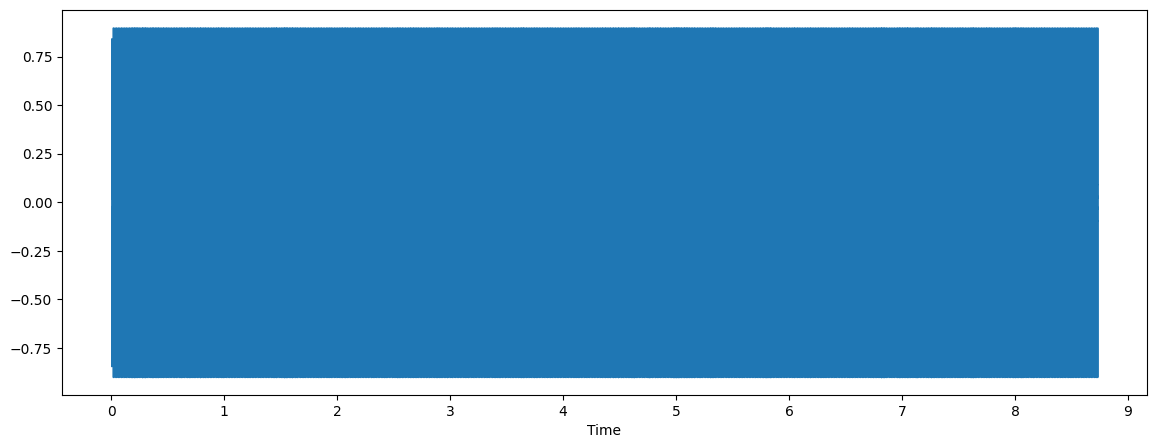

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
librosa.display.waveshow(x, sr=sr)

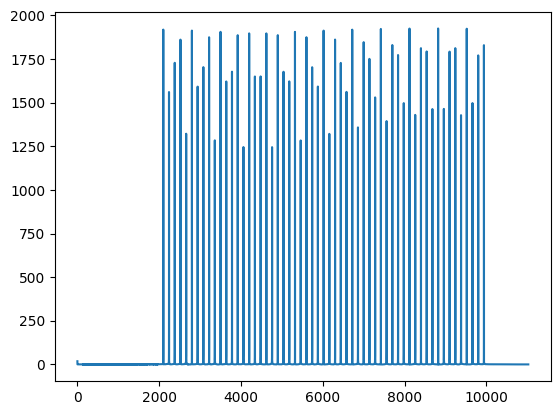

In [34]:
import numpy as np
from scipy.fft import rfft, rfftfreq


yf = rfft(x)
xf = rfftfreq(len(x), 1 / sr)

plt.plot(xf, np.abs(yf))

Filtering out the high pitched noise, ie: we only want to retain signals in the 100-2000 Hz range.

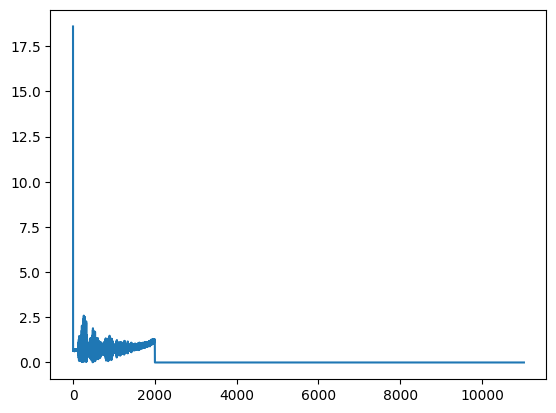

In [49]:
points_per_freq = len(xf) / (sr / 2)
target_idx = int(points_per_freq * 2000)

yf[target_idx:] = 0
plt.plot(xf, np.abs(yf))

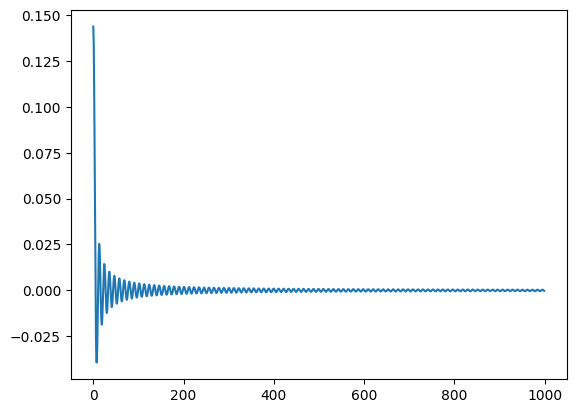

In [37]:
# inverse FFT
from scipy.fft import irfft

new_sig = irfft(yf)

plt.plot(new_sig[:1000])

In [38]:
def normalize(x: np.ndarray) -> np.ndarray:
    """Normalize to -1 < amptitude < 1"""
    return x * (1.0 / np.max(np.abs(x)))

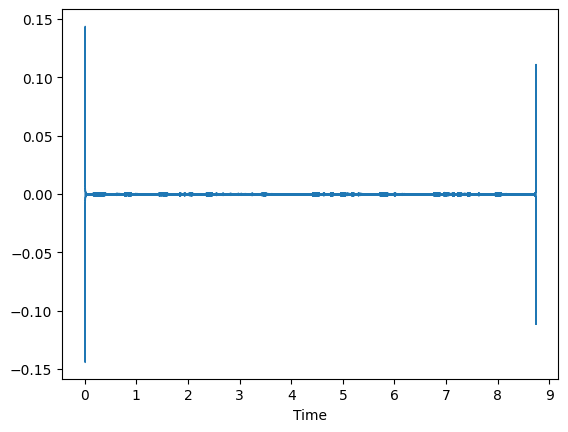

In [39]:
librosa.display.waveshow(new_sig, sr=sr)

In [40]:
# clip the 2 peaks at beginning and end

DURATION = librosa.get_duration(y=x, sr=sr)
CHUNKS_PER_SECOND = int(len(x) / DURATION)

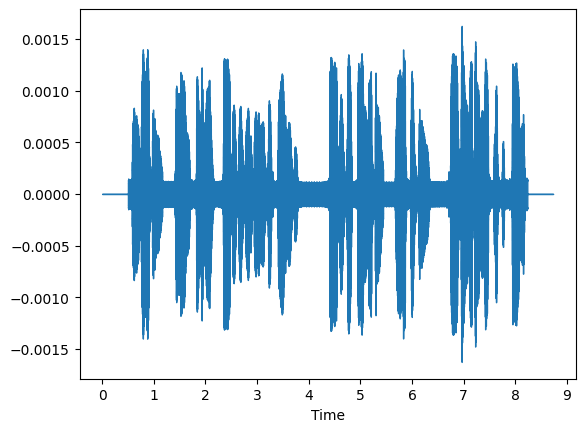

In [41]:
# make the first and last 0.5 seconds silent
new_sig[0:int(CHUNKS_PER_SECOND*0.5)] = 0
new_sig[-int(CHUNKS_PER_SECOND*0.5):] = 0 

librosa.display.waveshow(new_sig, sr=sr)

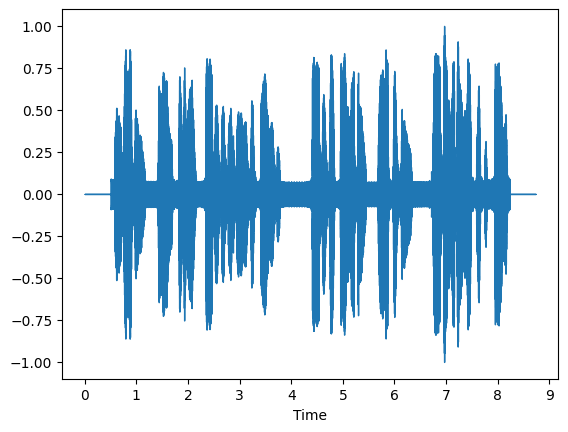

In [42]:
new_sig = normalize(new_sig)
librosa.display.waveshow(new_sig, sr=sr)

In [43]:
Audio(new_sig, rate=sr)

In [44]:
import soundfile as sf

sf.write("../data/Task_3/out.wav", data=new_sig, samplerate=sr)

In [45]:
!ffmpeg -i ../data/Task_3/out.wav -acodec pcm_s16le -ar 16000 -ac 1 ../data/Task_3/out_16kHz.wav

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [46]:
# run whisper.cpp on the downsampled + cleaned clip
!../whisper.cpp/main -f ../data/Task_3/out_16kHz.wav -m ../whisper.cpp/models/ggml-large-v2.bin -l tr -t 8 

whisper_init_from_file_with_params_no_state: loading model from '../whisper.cpp/models/ggml-large-v2.bin'
whisper_model_load: loading model
whisper_model_load: n_vocab       = 51865
whisper_model_load: n_audio_ctx   = 1500
whisper_model_load: n_audio_state = 1280
whisper_model_load: n_audio_head  = 20
whisper_model_load: n_audio_layer = 32
whisper_model_load: n_text_ctx    = 448
whisper_model_load: n_text_state  = 1280
whisper_model_load: n_text_head   = 20
whisper_model_load: n_text_layer  = 32
whisper_model_load: n_mels        = 80
whisper_model_load: ftype         = 1
whisper_model_load: qntvr         = 0
whisper_model_load: type          = 5 (large)
whisper_model_load: adding 1608 extra tokens
whisper_model_load: n_langs       = 99
whisper_model_load:      CPU buffer size =  3094.49 MB
whisper_model_load: model size    = 3093.99 MB
whisper_init_state: kv self size  =  220.20 MB
whisper_init_state: kv cross size =  245.76 MB
whisper_init_state: compute buffer (conv)   =   30.98 MB
w

In [47]:
# same command but add -tr flag to set task to translation
!../whisper.cpp/main -f ../data/Task_3/out_16kHz.wav -m ../whisper.cpp/models/ggml-large-v2.bin -l tr -t 8 -tr

whisper_init_from_file_with_params_no_state: loading model from '../whisper.cpp/models/ggml-large-v2.bin'
whisper_model_load: loading model
whisper_model_load: n_vocab       = 51865
whisper_model_load: n_audio_ctx   = 1500
whisper_model_load: n_audio_state = 1280
whisper_model_load: n_audio_head  = 20
whisper_model_load: n_audio_layer = 32
whisper_model_load: n_text_ctx    = 448
whisper_model_load: n_text_state  = 1280
whisper_model_load: n_text_head   = 20
whisper_model_load: n_text_layer  = 32
whisper_model_load: n_mels        = 80
whisper_model_load: ftype         = 1
whisper_model_load: qntvr         = 0
whisper_model_load: type          = 5 (large)
whisper_model_load: adding 1608 extra tokens
whisper_model_load: n_langs       = 99
whisper_model_load:      CPU buffer size =  3094.49 MB
whisper_model_load: model size    = 3093.99 MB
whisper_init_state: kv self size  =  220.20 MB
whisper_init_state: kv cross size =  245.76 MB
whisper_init_state: compute buffer (conv)   =   30.98 MB
w

In [48]:
# don't specify the language -> whisper will automatically detect it and translate to english
!../whisper.cpp/main -f ../data/Task_3/out_16kHz.wav -m ../whisper.cpp/models/ggml-large-v2.bin -t 8

whisper_init_from_file_with_params_no_state: loading model from '../whisper.cpp/models/ggml-large-v2.bin'
whisper_model_load: loading model
whisper_model_load: n_vocab       = 51865
whisper_model_load: n_audio_ctx   = 1500
whisper_model_load: n_audio_state = 1280
whisper_model_load: n_audio_head  = 20
whisper_model_load: n_audio_layer = 32
whisper_model_load: n_text_ctx    = 448
whisper_model_load: n_text_state  = 1280
whisper_model_load: n_text_head   = 20
whisper_model_load: n_text_layer  = 32
whisper_model_load: n_mels        = 80
whisper_model_load: ftype         = 1
whisper_model_load: qntvr         = 0
whisper_model_load: type          = 5 (large)
whisper_model_load: adding 1608 extra tokens
whisper_model_load: n_langs       = 99
whisper_model_load:      CPU buffer size =  3094.49 MB
whisper_model_load: model size    = 3093.99 MB
whisper_init_state: kv self size  =  220.20 MB
whisper_init_state: kv cross size =  245.76 MB
whisper_init_state: compute buffer (conv)   =   30.98 MB
w

The audio clip contains lyrics from *Do You Want to Build a **Snowman*** in the movie Frozen.